# Lab 9 - generowanie wykresów na podstawie danych odczytanych z plików

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## 1. Wykres liniowy na podstawie serii danych

### 1.1 Utworzenie serii danych

In [0]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2015', periods=1000))

In [7]:
ts.head()

2015-01-01   -0.891001
2015-01-02    0.142310
2015-01-03   -2.224476
2015-01-04    1.681939
2015-01-05   -0.325349
Freq: D, dtype: float64

In [8]:
ts.tail()

2017-09-22   -0.389806
2017-09-23    1.242285
2017-09-24   -1.188687
2017-09-25    0.519324
2017-09-26   -0.253634
Freq: D, dtype: float64

### 1.2 Utworzenie sumy skumulowanej kolejnych elementów serii

In [0]:
ts = ts.cumsum()

In [10]:
ts.head()

2015-01-01   -0.891001
2015-01-02   -0.748691
2015-01-03   -2.973167
2015-01-04   -1.291228
2015-01-05   -1.616577
Freq: D, dtype: float64

### 1.3 Generowanie wykresu

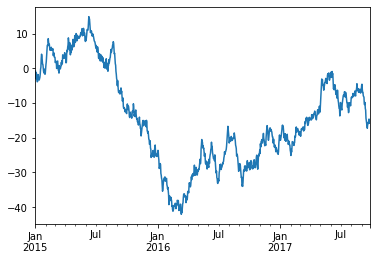

In [11]:
ts.plot()
plt.show()

## 2. Wykres kolumnowy ramki danych (pd.DataFrame)

Na przykładzie populacji w poszczególnych kontynentach.

### 2.1 Manualne utworzenie ramki danych na podstawie słownika

In [0]:
data = {
    'Kraj': ['Belgia',  'Indie',  'Brazylia', 'Polska'],
    'Stolica': ['Bruksela',  'New Delhi',  'Brasilia', 'Warszawa'],
    'Kontynent': ['Europa', 'Azja', 'Ameryka Południowa', 'Europa'],
    'Populacja': [11190846, 1303171035, 207847528, 38675467]
}

df = pd.DataFrame(data, columns=data.keys())

In [13]:
df

,Kraj,Stolica,Kontynent,Populacja
0,Belgia,Bruksela,Europa,11190846
1,Indie,New Delhi,Azja,1303171035
2,Brazylia,Brasilia,Ameryka Południowa,207847528
3,Polska,Warszawa,Europa,38675467


### 2.2 Utworzenie ramki grupującej populację w poszczegolnych kontynentach

In [0]:
df_groupped = df.groupby(['Kontynent']).agg({'Populacja': np.sum})

In [15]:
df_groupped

,Populacja
Kontynent,
Ameryka Południowa,207847528
Azja,1303171035
Europa,49866313


### 2.3 Wizualizacja

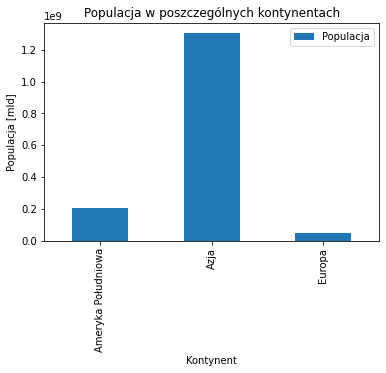

In [16]:
fig = df_groupped.plot.bar()
fig.set_xlabel('Kontynent')
fig.set_ylabel('Populacja [mld]')
fig.legend()
plt.title('Populacja w poszczególnych kontynentach')

plt.show()

## 3. Wykres kołowy na podstawie danych odczytanych z pliku

### 3.1 Utworzenie ramki danych na podstawie pliku csv

In [0]:
df = pd.read_csv('/content/gdrive/My Drive/wd/123/data/data.csv', header=0, delimiter=';')

In [18]:
df

,Imię i nazwisko,Data,Wartość zamówienia
0,Marek Michalski,2018-01-10,1200.0
1,Marek Michalski,2018-01-21,456.5
2,Alan Strzygło,2018-01-22,350.0
3,Marek Michalski,2018-01-23,800.0
4,Alan Strzygło,2018-01-24,349.0
5,Alan Strzygło,2018-01-26,1350.0


### 3.2 Utworzenie ramki grupującej zamówienia według poszczególnych sprzedawców

In [0]:
df_groupped = df.groupby(['Imię i nazwisko']).agg({'Wartość zamówienia': ['sum']})

In [20]:
df_groupped

,Wartość zamówienia
,sum
Imię i nazwisko,
Alan Strzygło,2049.0
Marek Michalski,2456.5


### 3.3 Wizualiacja

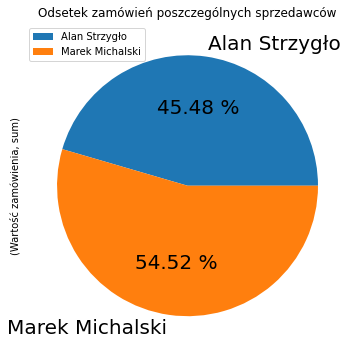

In [21]:
fig = df_groupped.plot.pie(subplots=True, autopct='%.2f % %', fontsize=20, figsize=(6, 6))
plt.title('Odsetek zamówień poszczególnych sprzedawców')
plt.legend(loc='upper left')

plt.show()

## 4. Wykres liniowy dwóch serii danych

### 4.1 Utworzenie losowo zainicjowanej serii danych

In [0]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2015', periods=1000))

In [24]:
ts.head()

2015-01-01   -0.349512
2015-01-02    0.149284
2015-01-03   -0.283809
2015-01-04    0.311602
2015-01-05    2.773924
Freq: D, dtype: float64

### 4.2 Utworzenie sumy skumulowanej kolejnych elementów serii

In [0]:
ts = ts.cumsum()

In [26]:
ts.head()

2015-01-01   -0.349512
2015-01-02   -0.200227
2015-01-03   -0.484036
2015-01-04   -0.172434
2015-01-05    2.601490
Freq: D, dtype: float64

### 4.3 Utworzenie ramki danych z serii zawierającej sumy skumulowane

In [0]:
df = pd.DataFrame(ts, columns=['Cumsum'])

In [28]:
df.head()

,Cumsum
2015-01-01,-0.349512
2015-01-02,-0.200227
2015-01-03,-0.484036
2015-01-04,-0.172434
2015-01-05,2.601490


### 4.4 Dodanie nowej serii do ramki jako średnią kroczącą serii sum skumulowanych

In [0]:
df['MA'] = df['Cumsum'].rolling(window=50).mean()

In [30]:
df.tail()

,Cumsum,MA
2017-09-22,29.321745,35.273242
2017-09-23,29.645836,35.162082
2017-09-24,29.105181,35.002047
2017-09-25,27.702362,34.784306
2017-09-26,28.453612,34.602764


### 4.5 Wizualizacja

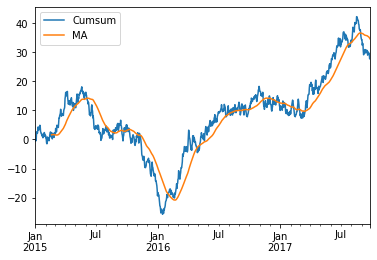

In [31]:
df.plot()
plt.show()